## Load Data

In [25]:
import pandas as pd
# Load the dataset
df = pd.read_csv('../dataset/MachineLearningRating_v3.txt', delimiter='|')
df.head()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9096\3561693973.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../dataset/MachineLearningRating_v3.txt', delimiter='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


## Check for Missing Values

In [28]:
# Count missing values
missing_counts = df.isnull().sum()
print(missing_counts)


UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

## Overall Loss Ratio


In [11]:
# Avoid division by zero
total_premium = df["TotalPremium"].sum()
total_claims = df["TotalClaims"].sum()

overall_loss_ratio = total_claims / total_premium
print(f"📊 Overall Loss Ratio: {overall_loss_ratio:.4f}")


# Loss Ratio by Province, VehicleType, Gender
# Define a function to calculate the ratio
def loss_ratio_grouped(df, group_col):
    grouped = df.groupby(group_col).agg({
        "TotalClaims": "sum",
        "TotalPremium": "sum"
    })
    grouped["LossRatio"] = grouped["TotalClaims"] / grouped["TotalPremium"]
    return grouped.sort_values(by="LossRatio", ascending=False)


print("📍 Loss Ratio by Province:")
print(loss_ratio_grouped(df, "Province"))

print("\n🚗 Loss Ratio by VehicleType:")
print(loss_ratio_grouped(df, "VehicleType"))

print("\n🚻 Loss Ratio by Gender:")
print(loss_ratio_grouped(df, "Gender"))


📊 Overall Loss Ratio: 1.0477
📍 Loss Ratio by Province:
                TotalClaims  TotalPremium  LossRatio
Province                                            
Gauteng        2.939415e+07  2.405377e+07   1.222018
KwaZulu-Natal  1.430138e+07  1.320908e+07   1.082693
Western Cape   1.038977e+07  9.806559e+06   1.059472
North West     5.920250e+06  7.490508e+06   0.790367
Mpumalanga     2.044675e+06  2.836292e+06   0.720897
Free State     3.549223e+05  5.213632e+05   0.680758
Limpopo        1.016477e+06  1.537324e+06   0.661199
Eastern Cape   1.356427e+06  2.140104e+06   0.633813
Northern Cape  8.949051e+04  3.165581e+05   0.282699

🚗 Loss Ratio by VehicleType:
                    TotalClaims  TotalPremium  LossRatio
VehicleType                                             
Heavy Commercial   7.504746e+05  4.609479e+05   1.628112
Medium Commercial  4.119867e+06  3.922746e+06   1.050251
Passenger Vehicle  5.992876e+07  5.720913e+07   1.047538
Light Commercial   6.045250e+04  2.604975e+05  

### Check All Column Data Types so I can know which is categorical and which is numerical

In [13]:
df.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

## check

In [29]:
numeric_cols = ['TotalClaims', 'CustomValueEstimate', 'TotalPremium']

# Coerce each one to numeric
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f"❌ Column '{col}' not found in DataFrame!")

In [30]:
financial_cols = [
    'SumInsured',
    # 'CustomValueEstimate',
    'TotalPremium',
    'TotalClaims',
    'CalculatedPremiumPerTerm',
    'CapitalOutstanding',
    'ExcessSelected'
]
# for i in financial_cols:
#     df[i].dtypes

df[financial_cols].dtypes


SumInsured                  float64
TotalPremium                float64
TotalClaims                 float64
CalculatedPremiumPerTerm    float64
CapitalOutstanding           object
ExcessSelected               object
dtype: object

## variable distribution

In [31]:
# setup
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set a consistent aesthetic
sns.set(style="whitegrid")

### Gender and province(Bar plot for categorical)

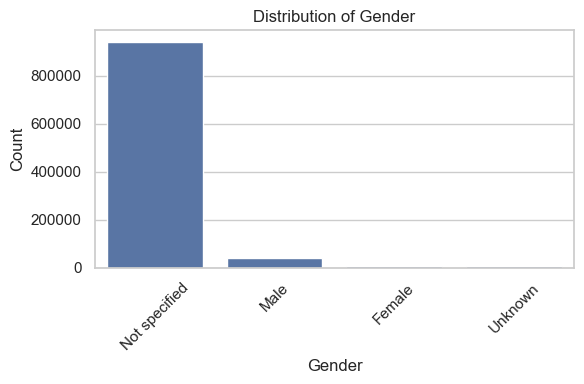

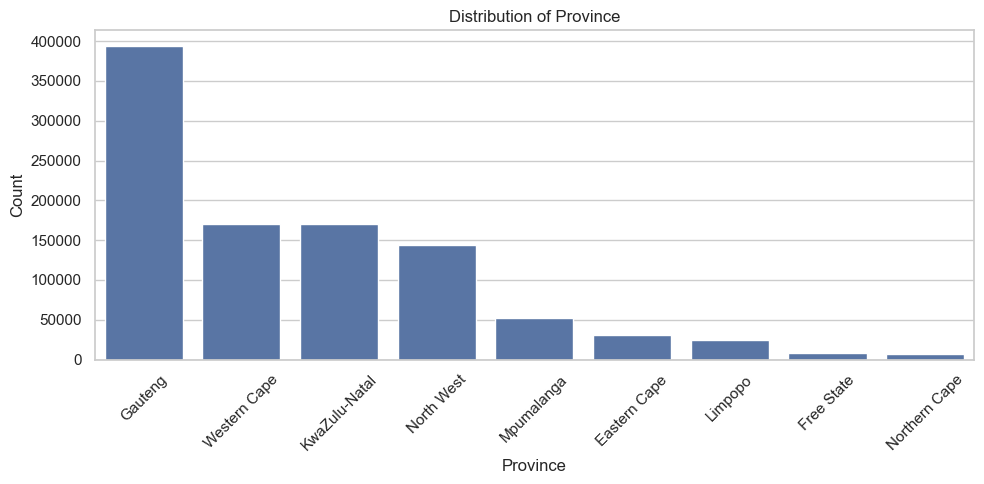

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
sns.countplot(x='Province', data=df, order=df['Province'].value_counts().index)
plt.title("Distribution of Province")
plt.xlabel("Province")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### TotalClaims,CustomValueEstimate,TotalPremium (Histogram for numerical values)

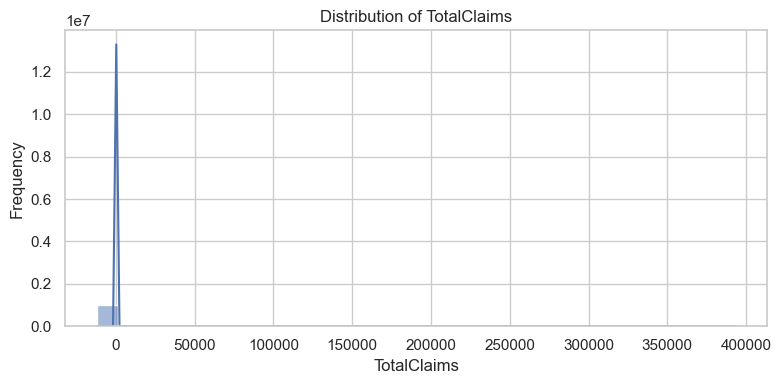

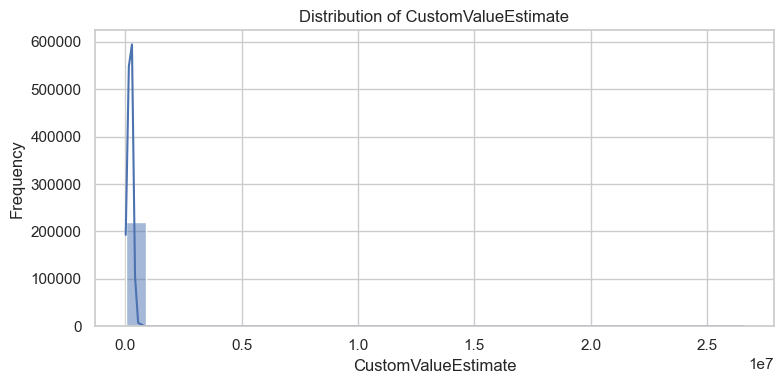

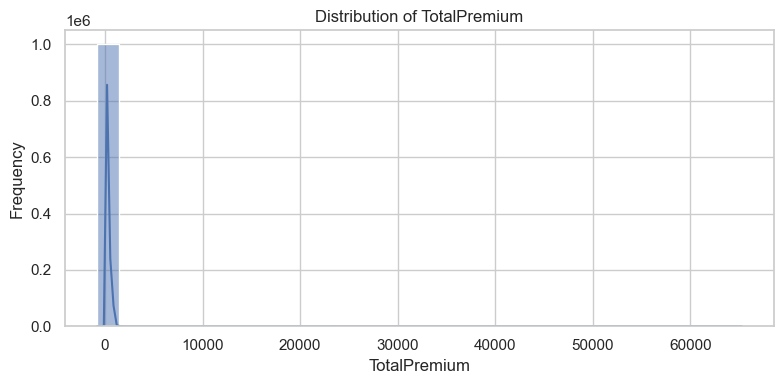

In [33]:
numeric_cols = ['TotalClaims', 'CustomValueEstimate', 'TotalPremium']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Plot histograms
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

### temporal trends

In [34]:
# Parse the date column
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
df.head()


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [36]:
# Calculate Claim Frequency per Month
# Claims with non-zero values
df['ClaimMade'] = df['TotalClaims'].fillna(0) > 0

# Group by month and count claims
claim_freq = df.groupby(df['TransactionMonth'].dt.to_period('M'))['ClaimMade'].sum().reset_index()
claim_freq.columns = ['Month', 'NumberOfClaims']

# Calculate Claim Severity (Average Claim Size per Month)

# Group by month and calculate mean of non-zero claims
claim_severity = df[df['TotalClaims'] > 0].groupby(df['TransactionMonth'].dt.to_period('M'))['TotalClaims'].mean().reset_index()
claim_severity.columns = ['Month', 'AvgClaimAmount']



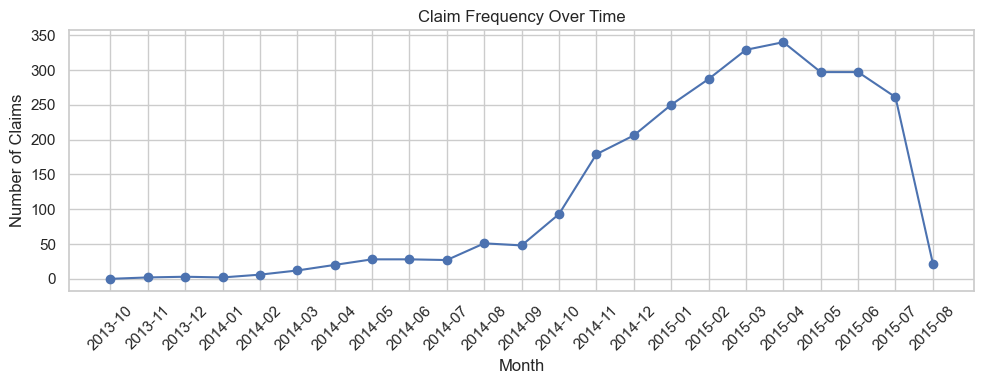

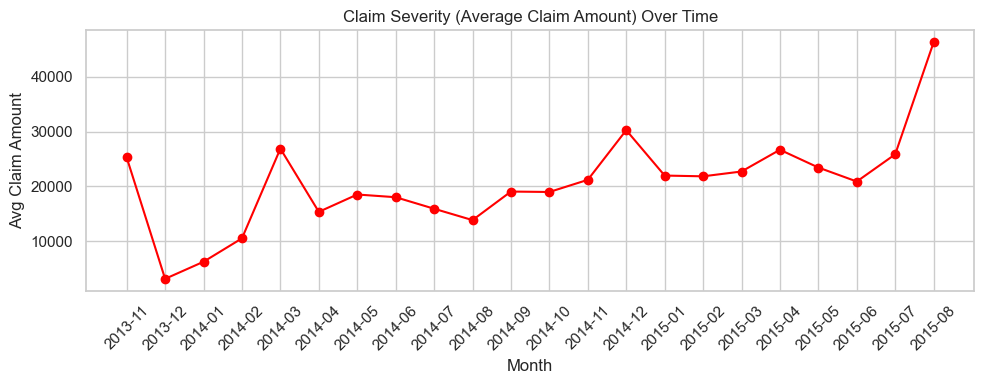

In [37]:
# Frequency
plt.figure(figsize=(10, 4))
plt.plot(claim_freq['Month'].astype(str), claim_freq['NumberOfClaims'], marker='o')
plt.xticks(rotation=45)
plt.title("Claim Frequency Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Claims")
plt.tight_layout()
plt.show()

# Severity
plt.figure(figsize=(10, 4))
plt.plot(claim_severity['Month'].astype(str), claim_severity['AvgClaimAmount'], color='red', marker='o')
plt.xticks(rotation=45)
plt.title("Claim Severity (Average Claim Amount) Over Time")
plt.xlabel("Month")
plt.ylabel("Avg Claim Amount")
plt.tight_layout()
plt.show()


## Which vehicle makes/models are associated with the highest and lowest claim amounts

In [38]:
# Group by Model and get average claim amount
claims_by_model = df.groupby('Model')['TotalClaims'].mean().reset_index()

# Drop models with NaN average claims (no claims)
claims_by_model = claims_by_model.dropna(subset=['TotalClaims'])

# Get top 10 models with highest average claims
highest_claims = claims_by_model.sort_values('TotalClaims', ascending=False).head(10)

# Get top 10 models with lowest average claims
lowest_claims = claims_by_model.sort_values('TotalClaims', ascending=True).head(10)

print("Top 10 Vehicle Models with Highest Avg Claim Amounts:")
print(highest_claims)

print("\nTop 10 Vehicle Models with Lowest Avg Claim Amounts:")
print(lowest_claims)


Top 10 Vehicle Models with Highest Avg Claim Amounts:
                           Model  TotalClaims
239  L/CRUISER FJ 4.0 V6 CRUISER  5340.970273
203       H-1 2.5 CRDI WAGON A/T  4118.181043
171       DUCATO 2.3 JTD VETRATO  1014.681021
282            POLO VIVO 1.6 5Dr   827.558882
83                 C180 BE COUPE   743.459027
327        SPRINTER 312D F/C P/V   664.540138
182                ERTIGA 1.4 GA   631.774519
404                 YARIS T1 3Dr   618.719846
45   A4 1.8T S AVANT MULTITRONIC   480.282859
275         POLO 1.6 COMFORTLINE   431.842105

Top 10 Vehicle Models with Lowest Avg Claim Amounts:
                         Model  TotalClaims
100          C200K CLASSIC A/T    -0.250832
391      VENTURE 2400D 6+4 New     0.000000
37            50C15V15 F/C P/V     0.000000
0           0305 M BAR B/S CCL     0.000000
410             YARIS ZEN3 ACS     0.000000
409                 YARIS ZEN3     0.000000
403              YARIS 1.3 5Dr     0.000000
55              ACCENT 1.5 CSi    

## Correlations and Associations

### Group by Month & PostalCode and aggregate

In [39]:
monthly_zip_agg = df.groupby([df['TransactionMonth'].dt.to_period('M'), 'PostalCode']).agg({
    'TotalClaims': 'sum',
    'TotalPremium': 'sum'
}).reset_index()

# Convert Period back to datetime for plotting
monthly_zip_agg['TransactionMonth'] = monthly_zip_agg['TransactionMonth'].dt.to_timestamp()


### Visualize with scatter plots

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9096\1552943554.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


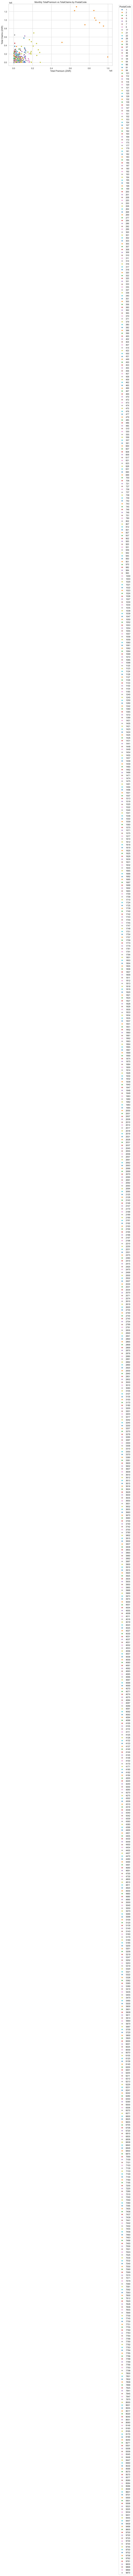

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=monthly_zip_agg, x='TotalPremium', y='TotalClaims', hue='PostalCode', palette='tab10')
plt.title("Monthly TotalPremium vs TotalClaims by PostalCode")
plt.xlabel("Total Premium (ZAR)")
plt.ylabel("Total Claims (ZAR)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='PostalCode')
plt.tight_layout()
plt.show()
